In [328]:
# To ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Campaign for selling personal loans.

- Read the column description and ensure you understand each attribute well
- Study the data distribution in each attribute, share your findings. (5 points)
- Get the target column distribution. Your comments
- Split the data into training and test set in the ratio of 70:30 respectively
- Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)
- Print the confusion matrix for all the above models (5 points)
- Give your reasoning on which is the best model in this case and why it performs better? (5 points)

##  Data Description:							
							
- ID =  &emsp;    Customer ID						
- Age=   &emsp;   Customer's age in completed years						
- Experience=  &emsp;  #years of professional experience						
- Income= &emsp;    Annual income of the customer dollar 000 <br>						
- ZIPCode=  &emsp;   Home Address ZIP code.						
- Family=  &emsp;    Family size of the customer						
- CCAvg	Avg=  &emsp;  spending on credit cards per month 000 in dollar					
- Education=  &emsp;  Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional						
- Mortgage=  &emsp;  Value of house mortgage if any. 000						
- Personal Loan =  &emsp;   Did this customer accept the personal loan offered in the last campaign?						
- Securities Account= &emsp;  Does the customer have a securities account with the bank?						
- CD Account =    &emsp;   Does the customer have a certificate of deposit (CD) account with the bank?						
- Online=  &emsp;  Does the customer use internet banking facilities?						
- CreditCard =	  &emsp;   Does the customer use a credit card issued by UniversalBank?						


## Importing and Reading the csv

In [329]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [330]:
loan_df = pd.read_csv ("Bank_Personal_Loan_Modelling-1.csv")
loan_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Checking for null values 

In [331]:
loan_df.info()
loan_df.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


0

# creating an extra feature for Classification 

In [332]:
loan_df["Per_Head_income"] = loan_df['Income'] / loan_df['Family']
loan_df['Per_Head_income'].head()

0     12.250000
1     11.333333
2     11.000000
3    100.000000
4     11.250000
Name: Per_Head_income, dtype: float64

In [333]:
loan_df["Saveing"] = loan_df['Income'] - loan_df['CCAvg'] / loan_df['Income']
loan_df['Saveing'].head()


0    48.967347
1    33.955882
2    10.909091
3    99.973000
4    44.977778
Name: Saveing, dtype: float64

### Cheking 5 point summary of data

In [334]:
loan_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.000,1250.750000,2500.500000,3750.250000,5000.000000
Age,5000.0,45.338400,11.463166,23.000,35.000000,45.000000,55.000000,67.000000
Experience,5000.0,20.104600,11.467954,-3.000,10.000000,20.000000,30.000000,43.000000
Income,5000.0,73.774200,46.033729,8.000,39.000000,64.000000,98.000000,224.000000
ZIP Code,5000.0,93152.503000,2121.852197,9307.000,91911.000000,93437.000000,94608.000000,96651.000000
Family,5000.0,2.396400,1.147663,1.000,1.000000,2.000000,3.000000,4.000000
CCAvg,5000.0,1.937938,1.747659,0.000,0.700000,1.500000,2.500000,10.000000
Education,5000.0,1.881000,0.839869,1.000,1.000000,2.000000,3.000000,3.000000
Mortgage,5000.0,56.498800,101.713802,0.000,0.000000,0.000000,101.000000,635.000000
Personal Loan,5000.0,0.096000,0.294621,0.000,0.000000,0.000000,0.000000,1.000000


In [335]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
Per_Head_income       5000 non-null float64
Saveing               5000 non-null float64
dtypes: float64(3), int64(13)
memory usage: 625.1 KB


# Inference from 5 point summary 
- Age columns is almost normally distributed as its mean value and median value are almost same. 
- Experience column is aslo almost normally distributed but it has negative value which is not accepted 
- Income column median is smaler then mean which shows it has positively skewness.
- CCAvg column is also positively skewed as median is smaller then mean
- CCAvg column have outliers on higher side.
- Mortgage column have outliers on higher side.
- Income column have outliers on higher side

# Outlier 

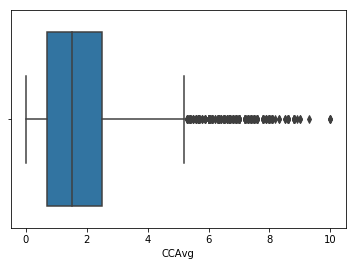

In [336]:
sns.boxplot(loan_df['CCAvg'])


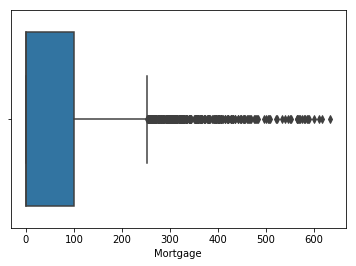

In [337]:
sns.boxplot(loan_df['Mortgage'])

- High number of outliers are observed in newly created feature called 'Per_head_income'
- High positive skewed fearture 

### Checking range of each column

In [338]:
for feature in loan_df.columns:
     print("Minmum value in column", feature ,"is", loan_df[feature].min(), "And Maximum value is", feature , loan_df[feature].max())
print("In Experience column minimum value is -3 which is not posible hence converting all vaues in columns to absolute values ")

Minmum value in column ID is 1 And Maximum value is ID 5000
Minmum value in column Age is 23 And Maximum value is Age 67
Minmum value in column Experience is -3 And Maximum value is Experience 43
Minmum value in column Income is 8 And Maximum value is Income 224
Minmum value in column ZIP Code is 9307 And Maximum value is ZIP Code 96651
Minmum value in column Family is 1 And Maximum value is Family 4
Minmum value in column CCAvg is 0.0 And Maximum value is CCAvg 10.0
Minmum value in column Education is 1 And Maximum value is Education 3
Minmum value in column Mortgage is 0 And Maximum value is Mortgage 635
Minmum value in column Personal Loan is 0 And Maximum value is Personal Loan 1
Minmum value in column Securities Account is 0 And Maximum value is Securities Account 1
Minmum value in column CD Account is 0 And Maximum value is CD Account 1
Minmum value in column Online is 0 And Maximum value is Online 1
Minmum value in column CreditCard is 0 And Maximum value is CreditCard 1
Minmum 

### Findings 
- Experience can never be Negative 

### Converting experience col values to its absolute value 

In [339]:
loan_df['Experience'] = abs(loan_df['Experience'])  

print ("Checking For Minimum vale in Experience column =  " ,loan_df["Experience"].min() )
print ('No negative values proves that we dont have Negative experience in the Experience columns')

Checking For Minimum vale in Experience column =   0
No negative values proves that we dont have Negative experience in the Experience columns


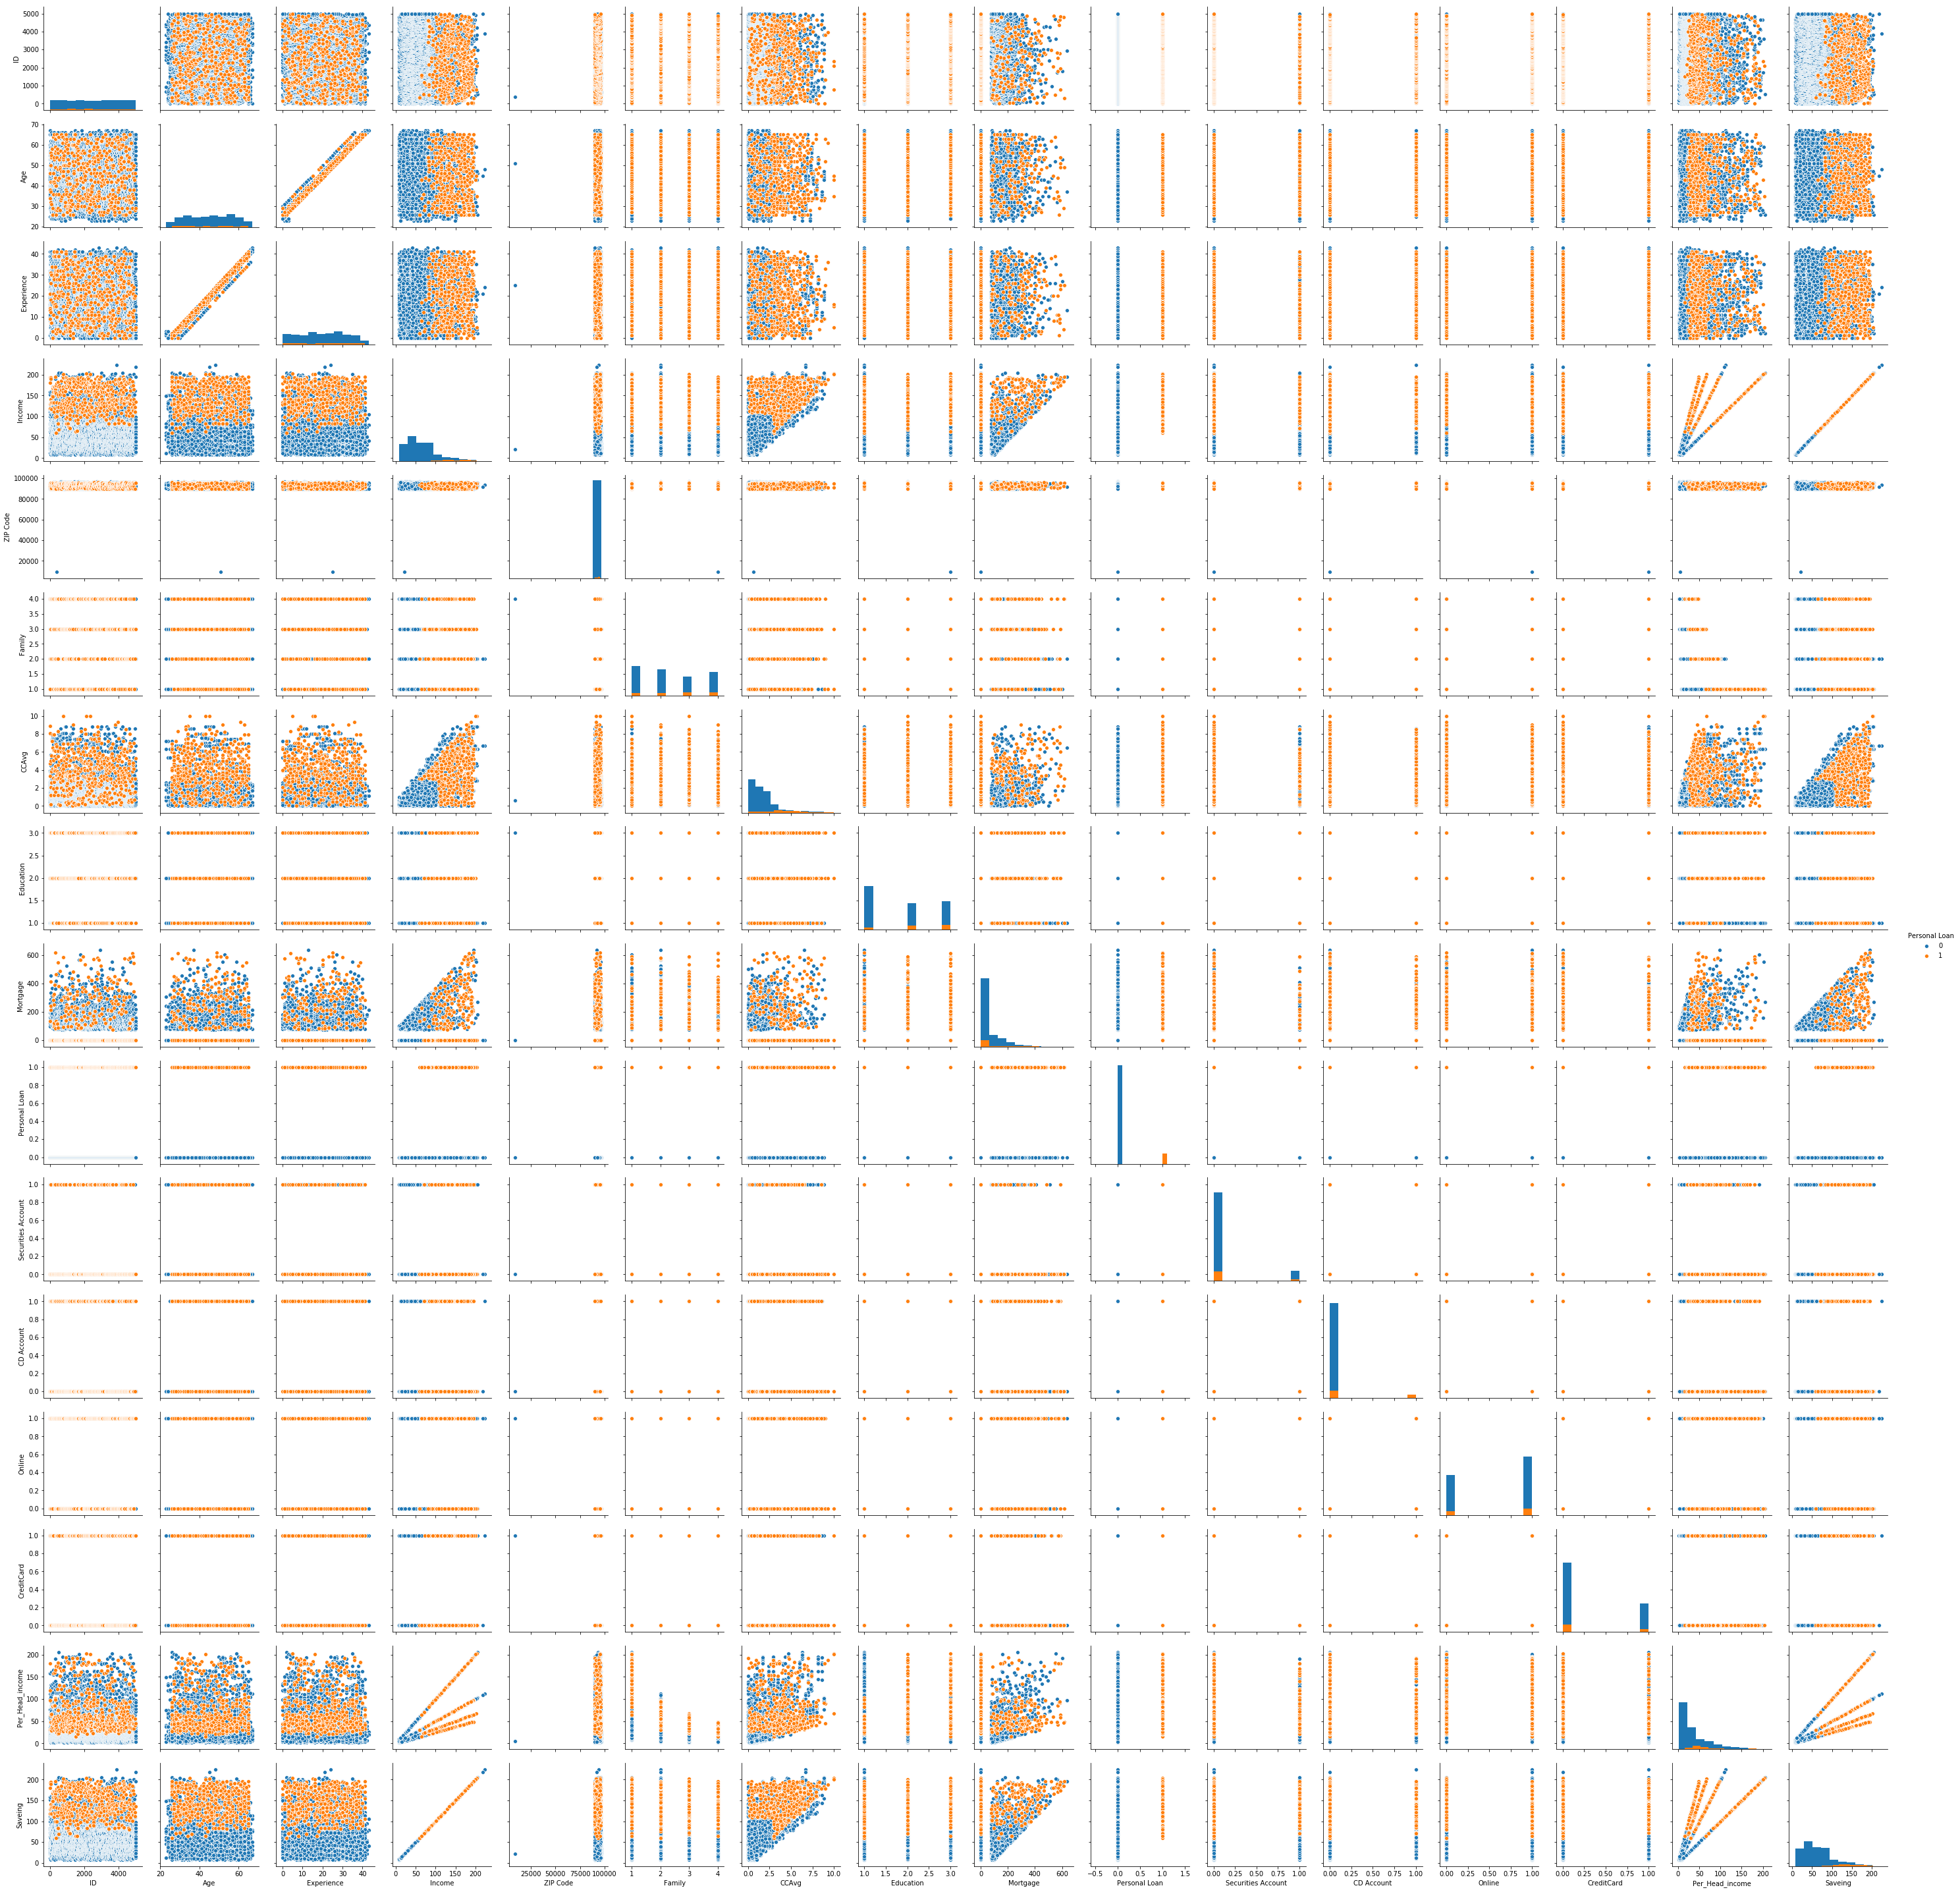

In [340]:
sns.pairplot(loan_df,diag_kind= "hist", hue="Personal Loan")

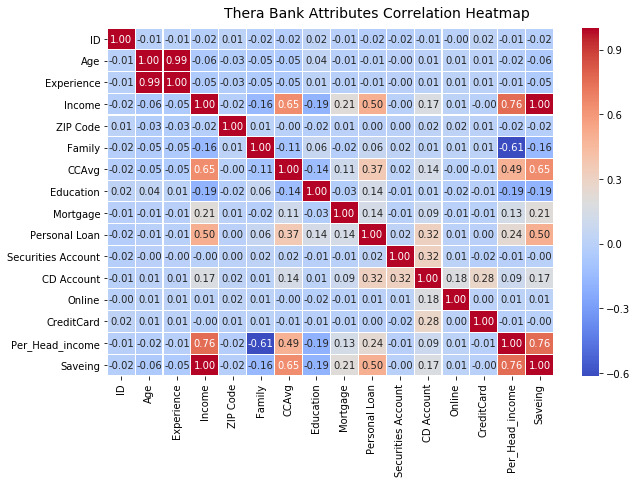

In [341]:
#sns.heatmap(loan_df.corr(),annot= True)
f, ax = plt.subplots(figsize=(10, 6))

hm = sns.heatmap(loan_df.corr(),annot= True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Thera Bank Attributes Correlation Heatmap', fontsize=14)

### Inference from the pairplot and correlation 
- from heatma maximum correlation observed was .99 between agae and experience 
- Positive and Negative correlation was observed 
- All correlations are not strong 
- Age and Experience are positivly corelated with 0.99 correlation factor 
- Very less corelation was observed between the columns
- those who have more income tend to spend more on credit card shoping per month.


'\nSecurities Account = Does the customer have a securities account with the bank?\n\n'

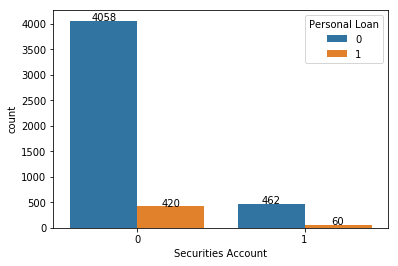

In [342]:
ax = sns.countplot(x="Securities Account",hue='Personal Loan', data=loan_df);
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 2,'{0:0}'.format(height),ha="center")
"""
Securities Account = Does the customer have a securities account with the bank?

"""


- From heatmap we can see the corelation between "Securities Account " and "Personal loan" is very low 0.02 
- And from the count plot we can see the conversion rate of people who opt for loan <b>who dont have</b> "securities Account" is  <b>10 %</b> and people<b> who  have </b>"securities Account" is <b> 12% </b>
- Securities Account feature is less important 

'\n\nCD Account = Does the customer have a certificate of deposit (CD) account with the bank?\n\n'

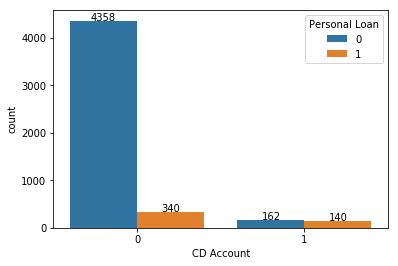

In [343]:
ax = sns.countplot(x="CD Account",hue='Personal Loan', data=loan_df);
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 2,'{0:0}'.format(height),ha="center")
"""

CD Account = Does the customer have a certificate of deposit (CD) account with the bank?

"""

- Does the customer have a certificate of deposit (CD) account with the bank, <b>Are likely to purchase the loan  </b> .
- From heatmap we can see the corelation between "CD Account " and "Personal loan" is 0.32 
- And from the count plot we can see the conversion rate of people who opt for loan <b>who dont have</b> "CD Account" is  <b>7 %</b> and people<b> who  have </b>"securities Account" is <b> 86% </b>
- CD Account feature is more important 

'\n\nOnline = Does the customer use internet banking facilities?\n\n\n'

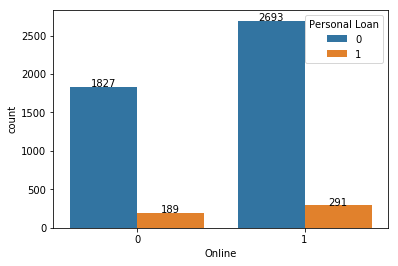

In [344]:
ax = sns.countplot(x="Online",hue='Personal Loan', data=loan_df);
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 2,'{0:0}'.format(height),ha="center")
"""

Online = Does the customer use internet banking facilities?


"""

- From heatmap we can see the corelation between "Online" and "Personal loan" is 0.01 
- And from the count plot we can see the conversion rate of people who opt for loan <b>who dont have</b> "Online facilities" is  <b> 10 %</b> and people<b> who  have </b>"Online facilities" is <b> 10 </b>
- Online feature is less importan

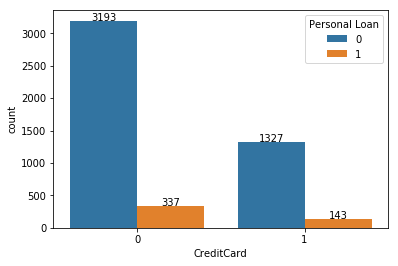

In [345]:
ax = sns.countplot(x="CreditCard",hue='Personal Loan', data=loan_df);
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 2,'{0:0}'.format(height),ha="center")

- From heatmap we can see the corelation between "CreditCard " and "Personal loan" is 0.00 
- And from the count plot we can see the conversion rate of people who opt for loan <b>who dont have</b> "CreditCard" is  <b> 10 %</b> and people<b> who  have </b>"CreditCard" is <b> 11% </b>
- Online feature is less importan

## Target column  

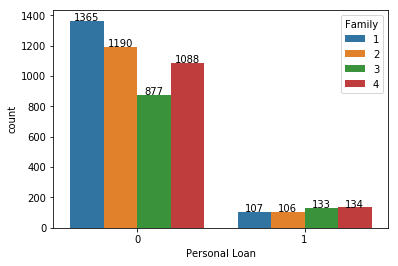

In [346]:
#y = loan_df['Personal Loan']
ax = sns.countplot(x="Personal Loan",hue='Family', data=loan_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 2,'{0:0}'.format(height),ha="center")

- From the above count plot we can say that conversion rate for loan purchasing for family of three person is high. Almost its upto 133/877 = 15% . 
- single person conversion rate for loan is 7%.
- family of 2 person conversion rate for loan is 8% .
- Fmily of 4 person conversion rate for loan is 12% 
- we can target those coustomers who has family member more then two to have better conversion rate 

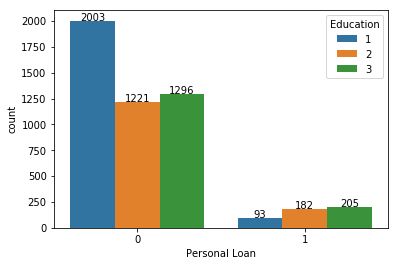

In [347]:
ax = sns.countplot(x="Personal Loan",hue='Education', data=loan_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 2,'{0:0}'.format(height),ha="center")

- From the above count plot we can say that , Education has an impact on the purchase of loans 
- People who are UnderGraduated less likly to opt for loan 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Per_Head_income,Saveing
Personal Loan,,,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480,480,480


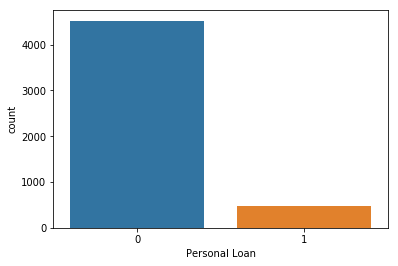

In [348]:
sns.countplot(loan_df['Personal Loan'])
loan_df.groupby(["Personal Loan"]).count()

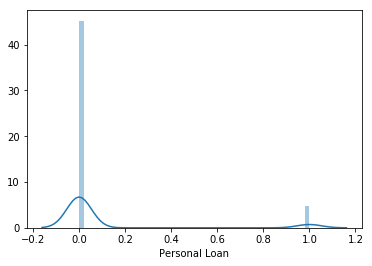

In [349]:
sns.distplot(loan_df['Personal Loan'] )

# Aim for this project
- <b>Bank Should reach to those Customer efficiently who want loan  </b>
- <b>Bank Shouldn't reach to those Customer who does not want loan to Optimize their resourceses</b>
- when Customer is in need or will going to be need for Loan, bank should reach him and our model should not classify that coustomer as "he is not going to take Loan " This is an undesirable situation for bank. So must minimize such occurences
- When model predict "No" but that coustomer wants loan this is the worst case for bank and we need to reduce such cases 
- We need to increase the recall for positive cases 
- We need to minimize Missclasification Rate 

### Spliting the data 

In [350]:
X = loan_df.drop(columns=['Personal Loan','ID'], axis=1)

In [351]:
y = loan_df['Personal Loan']

In [352]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [353]:
print ('X_traing shape = ' , X_train.shape)
print ('X_test shape = ' , X_test.shape)
print ('y_test shape = ' , y_test.shape)
print ('y_train shape = ' , y_train.shape)


X_traing shape =  (3500, 14)
X_test shape =  (1500, 14)
y_test shape =  (1500,)
y_train shape =  (3500,)


### scaling

In [354]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)
#X.head()

#  Logistic Regression

- confusion matrix

### finding the best feature `

In [355]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

#Selection of feature
nof_list=np.arange(1,13)      # creating array which is equale to number feature       
high_score=0   # toselec number of feature 
#Variable to store the optimum features
nof=0           
score_list =[] #to save the score of diffrent number of feature
for n in range(len(nof_list)): 
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    sc=StandardScaler()
    scaledX_train = sc.fit_transform(X_train)
    scaledX_test = sc.transform(X_test)
    
    model = LogisticRegression()  # Instantiating the model object for logistic regression 
    rfe = RFE(model,nof_list[n])  # instantiating the model for REF
    X_train_rfe = rfe.fit_transform(scaledX_train,y_train)  # REF object performing fit_transform action on (scaledX_train,y_train) 
    X_test_rfe = rfe.transform(scaledX_test)
    model.fit(X_train_rfe,y_train) # model object performing fit action on (X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test) 
    score_list.append(score)  #to store the score for each slection features set  
    if(score>high_score): #selecting the model with highest feature score 
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 12
Score with 12 features: 0.956000


In [358]:
logRegr = LogisticRegression()  
rfe = RFE(logRegr, 12)
fit = rfe.fit(scaledX_train, y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
cols = list(X.columns)

# To print column name  from boolean array
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print ('Best selected 12 Features are ')
print(selected_features_rfe)

logRegr.fit(scaledX_train, y_train)
predictions = logRegr.predict(scaledX_test)

#print(' test accuracy ' , logRegr.score(scaledX_test, y_test))

Num Features: 12
Selected Features: [ True  True  True False  True  True  True False  True  True  True  True
  True  True]
Feature Ranking: [1 1 1 3 1 1 1 2 1 1 1 1 1 1]
Best selected 12 Features are 
Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'Per_Head_income', 'Saveing'],
      dtype='object')


from mlxtend.feature_selection import SequentialFeatureSelector as sfs
sfs1 = logRegr(logRegr, k_features=8, forward=True, scoring='accuracy', cv=5)
sfs1 = logRegr.fit(x_train.values, y_train.values)

In [359]:
score_train = logRegr.score(scaledX_train, y_train)
print("Training Accuracy",score_train)
score_test = logRegr.score(scaledX_test, y_test)
print("Testing Accuracy",score_test)

Training Accuracy 0.9517142857142857
Testing Accuracy 0.9553333333333334


In [360]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,predictions))

[[1355   17]
 [  50   78]]


### confusion matrix colclusion 
- <b>Accuracy</b> = (True positive + True Negative )/ total = (78+1354)/ 1500 = 1432/1500 = 0.95533
- <b>Missclasification Rate</b>  = (False positive +False negative)/Total = (50+17)/1500 = 0.04533
- <b>True Positive Rate (Sensitivity/ Recall)</b>  = TP/Actual Positives = 78/ (78+50) = .61
- <b>False Positive Rate</b>  = How Often it predicts yes when it is no (1354 + 17)= 1372 = 17/1372 = 0.013
- <b>True Negative rate (Specificity)</b>  = how often it predict no when it is no = TN/Actual Negative = 1354/1372 =0.9868
- <b>Preicision </b>= when it predict yes and how often it is correct  = 78/(78+17) = 78/96 = 0.8125

In [361]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1372
           1       0.82      0.61      0.70       128

    accuracy                           0.96      1500
   macro avg       0.89      0.80      0.84      1500
weighted avg       0.95      0.96      0.95      1500



## Logistic Regression on Original Dataset 

In [362]:
X = loan_df.drop(columns=['Personal Loan','Per_Head_income','Saveing','ZIP Code'], axis=1)
y = loan_df['Personal Loan']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

print ('X_traing shape = ' , X_train.shape)
print ('X_test shape = ' , X_test.shape)
print ('y_test shape = ' , y_test.shape)
print ('y_train shape = ' , y_train.shape)


sc=StandardScaler()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)


logRegr = LogisticRegression()
logRegr.fit(scaledX_train, y_train)
predictions = logRegr.predict(scaledX_test)

logRegr.score(scaledX_train, y_train)
score_train = logRegr.score(scaledX_train, y_train)
print("Training Accuracy",score_train)
score_test = logRegr.score(scaledX_test, y_test)
print("Testing Accuracy",score_test)

print(confusion_matrix(y_test,predictions))
print(metrics.classification_report(y_test, predictions))

X_traing shape =  (3500, 12)
X_test shape =  (1500, 12)
y_test shape =  (1500,)
y_train shape =  (3500,)
Training Accuracy 0.9557142857142857
Testing Accuracy 0.9453333333333334
[[1318   22]
 [  60  100]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1340
           1       0.82      0.62      0.71       160

    accuracy                           0.95      1500
   macro avg       0.89      0.80      0.84      1500
weighted avg       0.94      0.95      0.94      1500



### confusion matrix colclusion 
- <b>Accuracy</b> = (True positive + True Negative )/ total = (100+1318)/ 1500 =1418 /1500 = 0.9453
- <b>Missclasification Rate</b>  = (False positive +False negative) = (60+22)/1500 = 0.05866
- <b>True Positive Rate (Sensitivity/ Recall)</b>  = TP/Actual Positives = 100/ (100+60) = .62
- <b>False Positive Rate</b>  = How Often it predicts yes when it is no FN/Acual Negative(1318 + 22)= 1340 => 22/1340 = 0.016
- <b>True Negative rate (Specificity)</b>  = how often it predict no when it is no = TN/Actual Negative = 1318/1340 =0.9835
- <b>Preicision </b>= when it predict yes and how often it is correct  = 100/(122) = 78/96 = 0.8196

# Conclusion for LOGISTIC REGRESSION 
- Using logisticregression on original dataset we get testing accuracy around 94.53% 

- And by using logisticregression along with some adittional feature Genrated from an original dataset along with orinal data set we can get testing accuracy around 95.46% 

- By adding features not only we can increase accuracy but also situations where customer likly to opt for loan and model predict it as not likly to take loan. With Orignal data set such occurence is 60 , and by adding new feature we reduce this number to 50 .
- So extra added feature it means derived feature are minimising the risk for banks where customers likly to lon but model predict then as not likly to opt for loan 

## Naive Bayes on derived feature 

In [364]:
from sklearn.naive_bayes import GaussianNB


### Spliting the data

In [365]:
# Spliting the data 

X = loan_df.drop(columns=['Personal Loan','ID'], axis=1)

y = loan_df['Personal Loan']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

print ('X_traing shape = ' , X_train.shape)
print ('X_test shape = ' , X_test.shape)
print ('y_test shape = ' , y_test.shape)
print ('y_train shape = ' , y_train.shape)


X_traing shape =  (3500, 14)
X_test shape =  (1500, 14)
y_test shape =  (1500,)
y_train shape =  (3500,)


In [366]:
model = GaussianNB()
model.fit(scaledX_train, y_train)
print(model)
# make predictions
predicted = model.predict(scaledX_test)


GaussianNB(priors=None, var_smoothing=1e-09)


In [368]:
#Accuracy of Training and test sets
score_train_df = model.score(scaledX_train, y_train)
print("Training Accuracy",score_train_df)
score_test_df = model.score(scaledX_test, y_test)
print("Testing Accuracy",score_test_df)

Training Accuracy 0.884
Testing Accuracy 0.8853333333333333


In [369]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predicted)
print(cm)

[[1229  111]
 [  61   99]]


In [370]:
# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1340
           1       0.47      0.62      0.54       160

    accuracy                           0.89      1500
   macro avg       0.71      0.77      0.73      1500
weighted avg       0.90      0.89      0.89      1500



## Naiev Bayes model on orignal dataset 

In [371]:
X = loan_df.drop(columns=['Personal Loan','Per_Head_income','Saveing'], axis=1)
y = loan_df['Personal Loan']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

print ('X_traing shape = ' , X_train.shape)
print ('X_test shape = ' , X_test.shape)
print ('y_test shape = ' , y_test.shape)
print ('y_train shape = ' , y_train.shape)

model = GaussianNB()
model.fit(scaledX_train, y_train)
print(model)
# make predictions
predicted = model.predict(scaledX_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))

#Accuracy of Training and test sets
score_train_df = model.score(scaledX_train, y_train)
print("Training Accuracy",score_train_df)
score_test_df = model.score(scaledX_test, y_test)
print("Testing Accuracy",score_test_df)


from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predicted)
print(cm)

# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))


X_traing shape =  (3500, 13)
X_test shape =  (1500, 13)
y_test shape =  (1500,)
y_train shape =  (3500,)
GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1340
           1       0.47      0.62      0.54       160

    accuracy                           0.89      1500
   macro avg       0.71      0.77      0.73      1500
weighted avg       0.90      0.89      0.89      1500

Training Accuracy 0.884
Testing Accuracy 0.8853333333333333
[[1229  111]
 [  61   99]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1340
           1       0.47      0.62      0.54       160

    accuracy                           0.89      1500
   macro avg       0.71      0.77      0.73      1500
weighted avg       0.90      0.89      0.89      1500



### Naiev Bayes model conclusion 

- Tessting Accuracy of Naiev Base model with And without extra feature is found to be  88.533%
- which is far less then logistic regression 
- And customer flasely predicted for not likly having loans are also high

## KNN model On derived Feature along with orignal Data

### Spliting the data

In [433]:
from sklearn.neighbors import KNeighborsClassifier
X = loan_df.drop(columns=['Personal Loan','ID'], axis=1)

y = loan_df['Personal Loan']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

print ('X_traing shape = ' , X_train.shape)
print ('X_test shape = ' , X_test.shape)
print ('y_test shape = ' , y_test.shape)
print ('y_train shape = ' , y_train.shape)

sc=StandardScaler()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)


X_traing shape =  (3500, 14)
X_test shape =  (1500, 14)
y_test shape =  (1500,)
y_train shape =  (3500,)


In [439]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaledX_train,y_train)
test_pred=knn.predict(scaledX_test)

In [442]:
from sklearn.metrics import accuracy_score
print("Performance Score of classification on test dataset is")
print (accuracy_score(test_pred,y_test))
print("Performance Score of classification on training dataset is")
print (knn.score(scaledX_train,y_train))
print(metrics.classification_report(y_test, test_pred)) # KNN

Performance Score of classification on test dataset is
0.9653333333333334
Performance Score of classification on training dataset is
0.97
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1372
           1       0.96      0.62      0.75       128

    accuracy                           0.97      1500
   macro avg       0.96      0.81      0.87      1500
weighted avg       0.97      0.97      0.96      1500



In [436]:
cm_KNN=confusion_matrix(y_test,test_pred)
print(cm_KNN)

[[1369    3]
 [  49   79]]


### Best value of k 

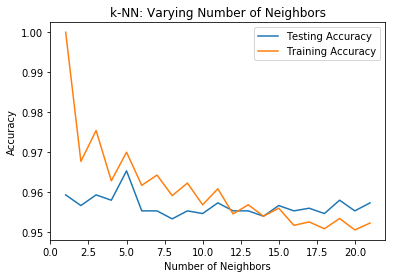

Best accuracy of testing is 0.9653333333333334 with K = 5


In [437]:
import numpy
neighbors =np.arange(1,22)
train_accuracy_plot = []
test_accuracy_plot = []

#loop for different values of K
for i, k in enumerate(neighbors):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=25)
    sc=StandardScaler()
    scaledX_train = sc.fit_transform(X_train)
    scaledX_test = sc.transform(X_test)
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledX_train,y_train)
    train_accuracy_plot.append(knn.score(scaledX_train,y_train))
    test_accuracy_plot.append(knn.score(scaledX_test,y_test))
    
#Creating Plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

#value of k at max accuracy 
print("Best accuracy of testing is {} with K = {}".format(np.max(test_accuracy_plot),1+test_accuracy_plot.index(np.max(test_accuracy_plot))))

# KNN Model on Original Data

In [443]:
X = loan_df.drop(columns=['Personal Loan','Per_Head_income','Saveing'], axis=1)
y = loan_df['Personal Loan']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

print ('X_traing shape = ' , X_train.shape)
print ('X_test shape = ' , X_test.shape)
print ('y_test shape = ' , y_test.shape)
print ('y_train shape = ' , y_train.shape)

sc=StandardScaler()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)

#from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaledX_train,y_train)
test_pred=knn.predict(scaledX_test)

from sklearn.metrics import accuracy_score
print("Performance Score of classification on test dataset is")
print (accuracy_score(test_pred,y_test))
print("Performance Score of classification on training dataset is")
print (knn.score(scaledX_train,y_train))
print(metrics.classification_report(y_test, test_pred)) # KNN



X_traing shape =  (3500, 13)
X_test shape =  (1500, 13)
y_test shape =  (1500,)
y_train shape =  (3500,)
Performance Score of classification on test dataset is
0.9453333333333334
Performance Score of classification on training dataset is
0.9651428571428572
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1340
           1       0.92      0.53      0.67       160

    accuracy                           0.95      1500
   macro avg       0.94      0.76      0.82      1500
weighted avg       0.94      0.95      0.94      1500



In [444]:
cm_KNN=confusion_matrix(y_test,test_pred)
print(cm_KNN)

[[1333    7]
 [  75   85]]


### Best Value for k 

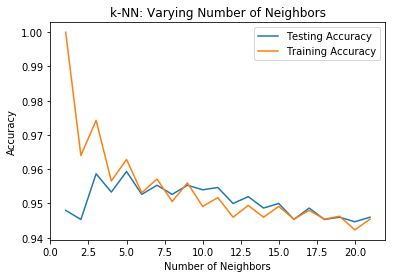

Best accuracy of testing is 0.9593333333333334 with K = 5


In [419]:
import numpy
neighbors =np.arange(1,22)
train_accuracy_plot = []
test_accuracy_plot = []

#loop for different values of K
for i, k in enumerate(neighbors):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=25)
    sc=StandardScaler()
    scaledX_train = sc.fit_transform(X_train)
    scaledX_test = sc.transform(X_test)
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledX_train,y_train)
    train_accuracy_plot.append(knn.score(scaledX_train,y_train))
    test_accuracy_plot.append(knn.score(scaledX_test,y_test))
    
#Creating Plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

#value of k at max accuracy 
print("Best accuracy of testing is {} with K = {}".format(np.max(test_accuracy_plot),1+test_accuracy_plot.index(np.max(test_accuracy_plot))))


### Conclussion for KNN model 
- Accuracy for test data on derived feature along with original dataset  is found to be 96.53% 
- Accuracy for test data on original dataset  is found to be 94.53% 
- All the parameter of confusion matrix are good for derived feature dataset 
- Ocurence of falsly classified customer likly to take loan as not likly to opt for loan is less for derived feature dataset 
- Best value of K is found to be 5 in both the cases 